In [1]:
import os
from glob import glob


5032
5036
5038
5039
5040
5041
5043
5045
5046
5047
5051
5052
5053
5116
5117
5119
5120
5124
5125
5126
5127
5128
5129
5130
5137
5138
5139
5153
5158
5159
5160
5162
5163
5164
5165
5166
5167
5168
5169
5180
5181
5182
5183
5189
5190
5191
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5208
5211
5212
5215
5216
5219
5220
5221
5222
5223
5225
5229
5230
5231
5232
5233
5234
5235
5237
5238
5239
5247
5248
5249
5250
5252
5253
5257
5258
5259
5261
5262
5300
5301
5302
5303
5304
5305
5306
5307
5310
5311
5315
5316
5317
5318
5319
5320
5323
5324
5325
5333
5334
5335
5336
5339
5340
5341
5342
5343
5344
5345
5346
5347
5349
5351
5354
5355
5356
5357
5358
5359
5360
5361
5362
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5386
5390
5391
5392
5393
5394
5398
5399
5400
5401
5402
5403
5404
5406
5407
5414
5415
5416
5417
5418
5419
5422
5423
5424
5425
5426
5428
5429
5430
5431
5432
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5447
5448
5449
5450


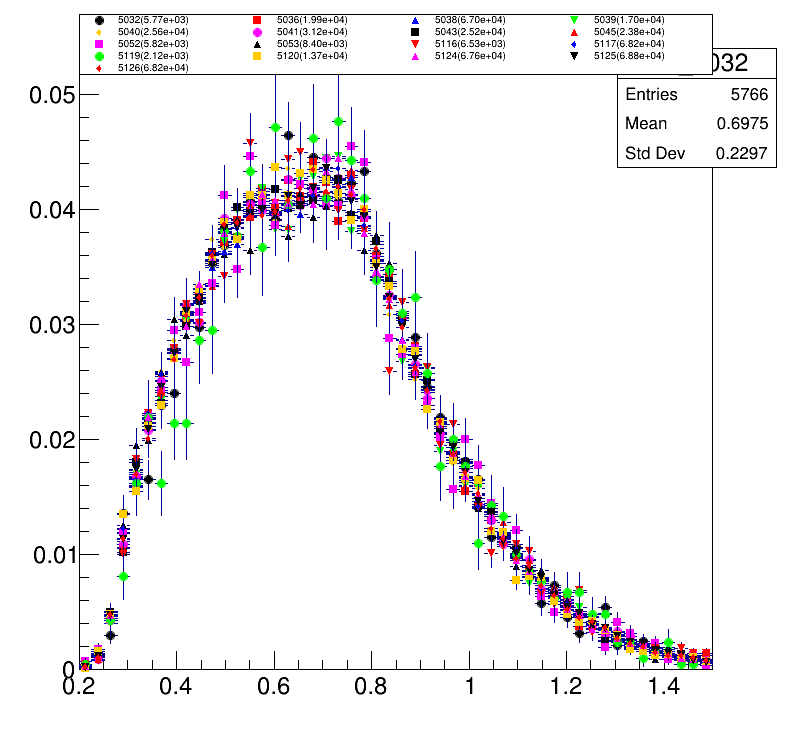

In [12]:
import os
from glob import glob
import ROOT
import copy

# Define the maximum number of histograms per canvas
Nmax = 20

# Create a list to store canvases
canvas_list = []

# Sort the file list
files = glob("/work/clas12/users/gmat/clas12/clas12_dihadrons/projects/pipi0_paper_RGA_only/volatile/data/piplus_pi0/nSidis_RGA_5*.root")
files = sorted(files)

# Create a canvas for plotting
canvas = ROOT.TCanvas("canvas", "Histograms", 800, 800)

# Create a legend
legend = ROOT.TLegend(0.1, 0.9, 0.9, 0.98)
legend.SetNColumns(4)

# Define marker colors and styles
marker_colors = [ROOT.kBlack, ROOT.kRed, ROOT.kBlue, ROOT.kGreen, ROOT.kOrange, ROOT.kMagenta]
marker_styles = [ROOT.kFullCircle, ROOT.kFullSquare, ROOT.kFullTriangleUp, ROOT.kFullTriangleDown, ROOT.kFullDiamond]

hists=[]
# Loop over the files
for i, file_path in enumerate(files):
    # Extract the number after "RGA" in the file's name
    number = int(os.path.basename(file_path).split("RGA_")[1][:4])
    print(number)
    # Open the root file
    root_file = ROOT.TFile(file_path)
    
    # Get the TTree
    tree = root_file.Get("dihadron_cuts")
    
    # Create a unique histogram name
    hist_name = f"hist_{number}"
    
    # Create a histogram
    hists.append(ROOT.TH1F(hist_name, f"", 50, 0.2, 1.5))

    # Set marker color and style
    hists[-1].SetMarkerColor(marker_colors[i % len(marker_colors)])
    hists[-1].SetMarkerStyle(marker_styles[i % len(marker_styles)])

    # Fill the histogram with data from the TTree
    tree.Draw(f"Mh >> {hist_name}", "", "goff")

    # Normalize the histogram to an integral of 1
    if hists[-1].Integral() == 0:
        continue

    hists[-1].Scale(1.0 / hists[-1].Integral())
    
    # Add the histogram to the legend
    legend.AddEntry(hists[-1], f"{number}({hists[-1].GetEntries():.2e})", "p")
    
    # Plot the histogram on the canvas
    hists[-1].Draw("P same")
    hists[-1].SetDirectory(0)
    
    # Check if a new canvas needs to be created
    if (i + 1) % Nmax == 0 or i == len(files) - 1:
        # Save the current canvas to the list
        legend.Draw()
        canvas_list.append(copy.deepcopy(canvas))
        
        # Reset the canvas and legend for the next set of histograms
        canvas.Clear()
        legend.Clear()

# Draw the legend
legend.Draw()

# Update the canvas
canvas_list[0].Draw()

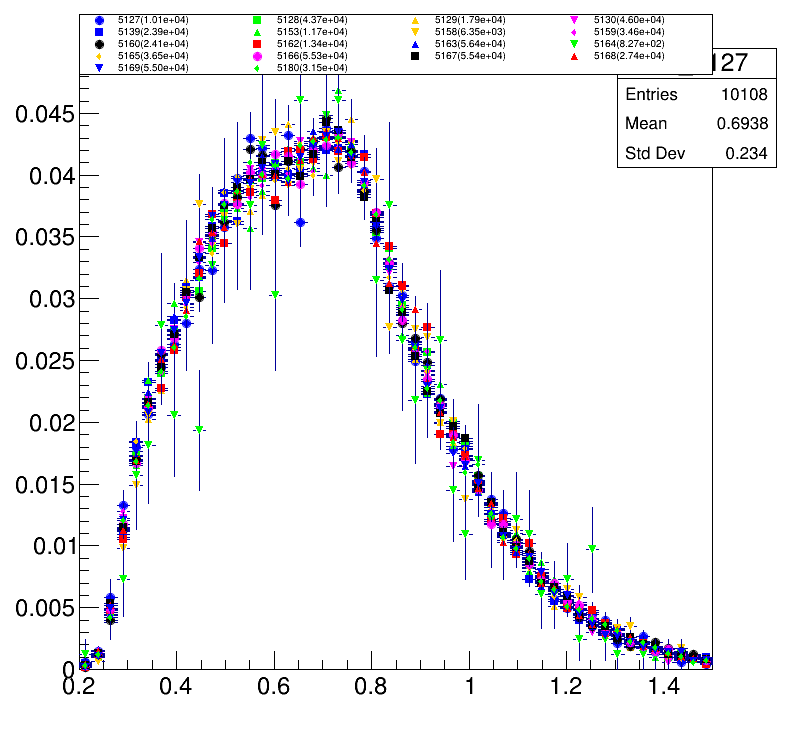

In [3]:
canvas_list[1].Draw()

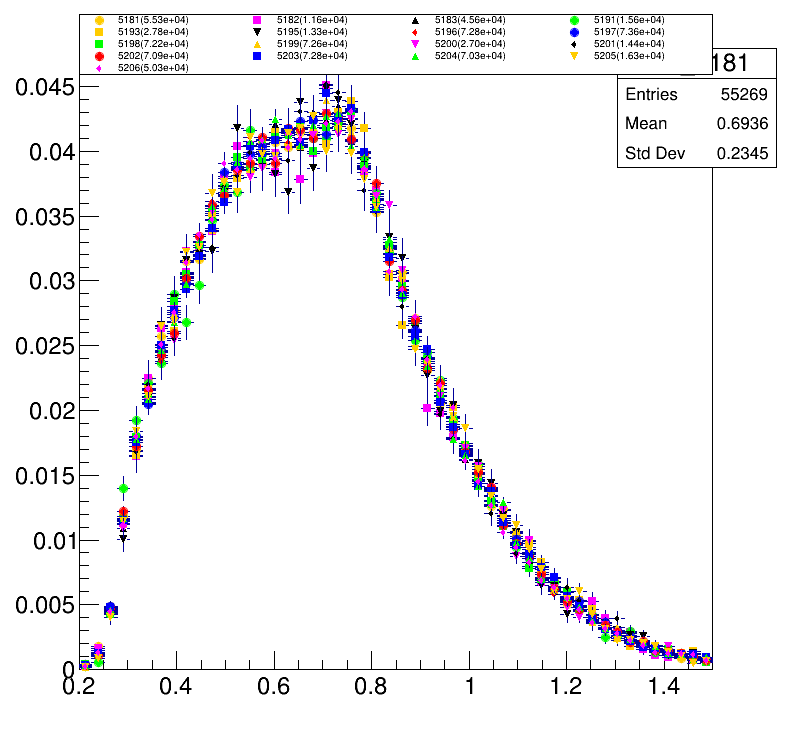

In [6]:
canvas_list[2].Draw()

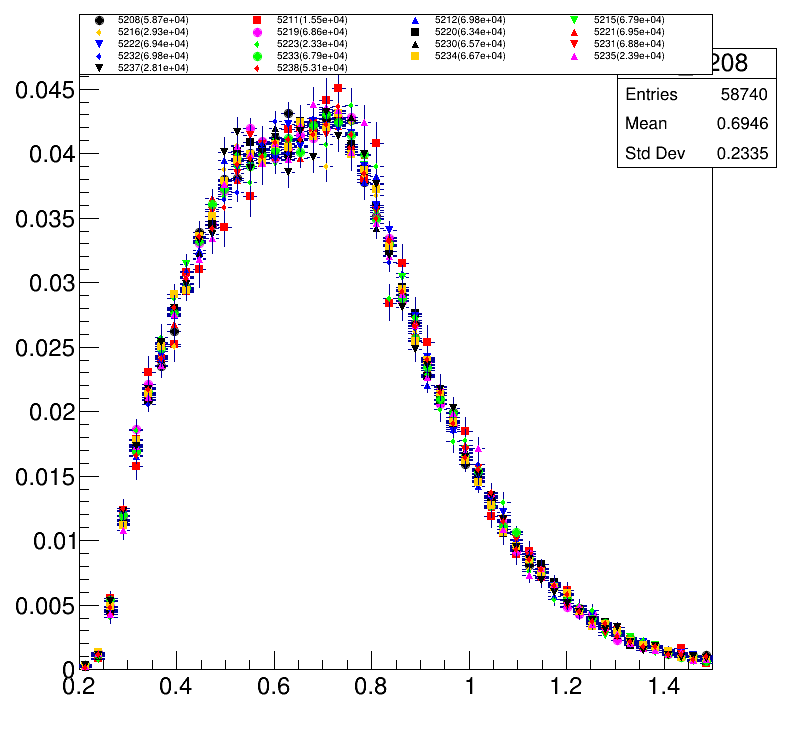

In [13]:
canvas_list[3].Draw()

5032
5036
5038
5039
5040
5041
5043
5045
5046
5047
5051
5052
5053
5116
5117
5119
5120
5124
5125
5126
5127
5128
5129
5130
5137
5138
5139
5153
5158
5159
5160
5162
5163
5164
5165
5166
5167
5168
5169
5180
5181
5182
5183
5189
5190
5191
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5208
5211
5212
5215
5216
5219
5220
5221
5222
5223
5225
5229
5230
5231
5232
5233
5234
5235
5237
5238
5239
5247
5248
5249
5250
5252
5253
5257
5258
5259
5261
5262
5300
5301
5302
5303
5304
5305
5306
5307
5310
5311
5315
5316
5317
5318
5319
5320
5323
5324
5325
5333
5334
5335
5336
5339
5340
5341
5342
5343
5344
5345
5346
5347
5349
5351
5354
5355
5356
5357
5358
5359
5360
5361
5362
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5386
5390
5391
5392
5393
5394
5398
5399
5400
5401
5402
5403
5404
5406
5407
5414
5415
5416
5417
5418
5419
5422
5423
5424
5425
5426
5428
5429
5430
5431
5432
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5447
5448
5449
5450


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


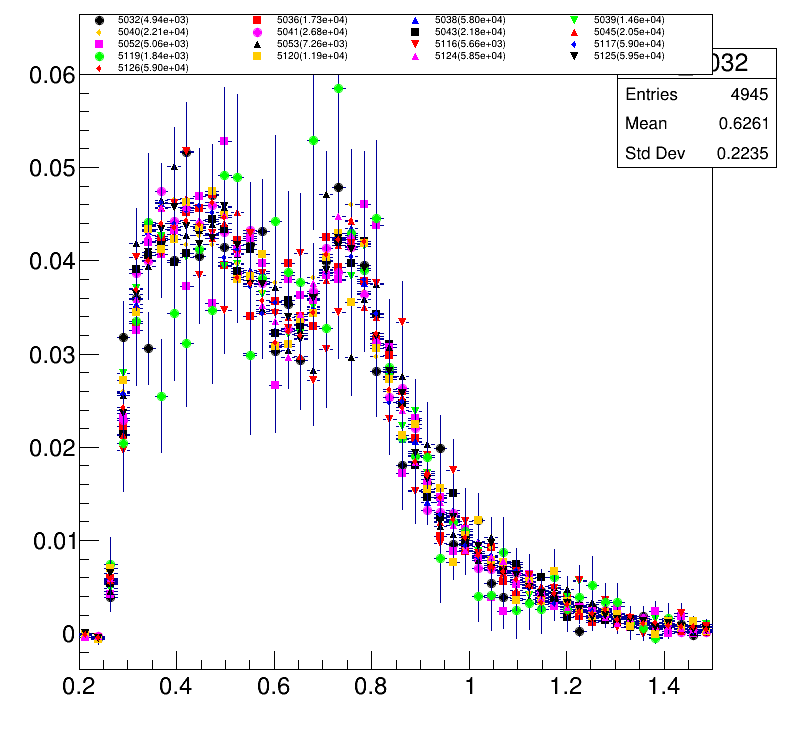

In [17]:
import os
from glob import glob
import ROOT
import copy

# Define the maximum number of histograms per canvas
Nmax = 20

# Create a list to store canvases
canvas_list = []

# Sort the file list
files = glob("/work/clas12/users/gmat/clas12/clas12_dihadrons/projects/pipi0_paper_RGA_only/volatile/data/piplus_pi0/nSidis_RGA_5*.root")
files = sorted(files)
file = "/work/clas12/users/gmat/clas12/clas12_dihadrons/projects/pipi0_paper_RGA_only/volatile/asym/Fall2018_RGA_inbending/precut/piplus_pi0/Mh/AZI/outsPlotBins/DataWeightedTree.root"
tfile = ROOT.TFile(file)
tree = tfile.Get("dihadron_cuts")
# Create a canvas for plotting
canvas = ROOT.TCanvas("canvas", "Histograms", 800, 800)

# Create a legend
legend = ROOT.TLegend(0.1, 0.9, 0.9, 0.98)
legend.SetNColumns(4)

# Define marker colors and styles
marker_colors = [ROOT.kBlack, ROOT.kRed, ROOT.kBlue, ROOT.kGreen, ROOT.kOrange, ROOT.kMagenta]
marker_styles = [ROOT.kFullCircle, ROOT.kFullSquare, ROOT.kFullTriangleUp, ROOT.kFullTriangleDown, ROOT.kFullDiamond]

hists=[]
# Loop over the files
for i, file_path in enumerate(files):
    # Extract the number after "RGA" in the file's name
    number = int(os.path.basename(file_path).split("RGA_")[1][:4])
    print(number)

    # Create a unique histogram name
    hist_name = f"hist_{number}"
    
    # Create a histogram
    hists.append(ROOT.TH1F(hist_name, f"", 50, 0.2, 1.5))

    # Set marker color and style
    hists[-1].SetMarkerColor(marker_colors[i % len(marker_colors)])
    hists[-1].SetMarkerStyle(marker_styles[i % len(marker_styles)])

    # Fill the histogram with data from the TTree
    tree.Draw(f"Mh >> {hist_name}", f"(run=={number})*Signal", "goff")

    # Normalize the histogram to an integral of 1
    if hists[-1].Integral() == 0:
        continue

    hists[-1].Scale(1.0 / hists[-1].Integral())
    
    # Add the histogram to the legend
    legend.AddEntry(hists[-1], f"{number}({hists[-1].GetEntries():.2e})", "p")
    
    # Plot the histogram on the canvas
    hists[-1].Draw("P same")
    hists[-1].SetDirectory(0)
    
    # Check if a new canvas needs to be created
    if (i + 1) % Nmax == 0 or i == len(files) - 1:
        # Save the current canvas to the list
        legend.Draw()
        canvas_list.append(copy.deepcopy(canvas))
        
        # Reset the canvas and legend for the next set of histograms
        canvas.Clear()
        legend.Clear()

# Draw the legend
legend.Draw()

# Update the canvas
canvas_list[0].Draw()

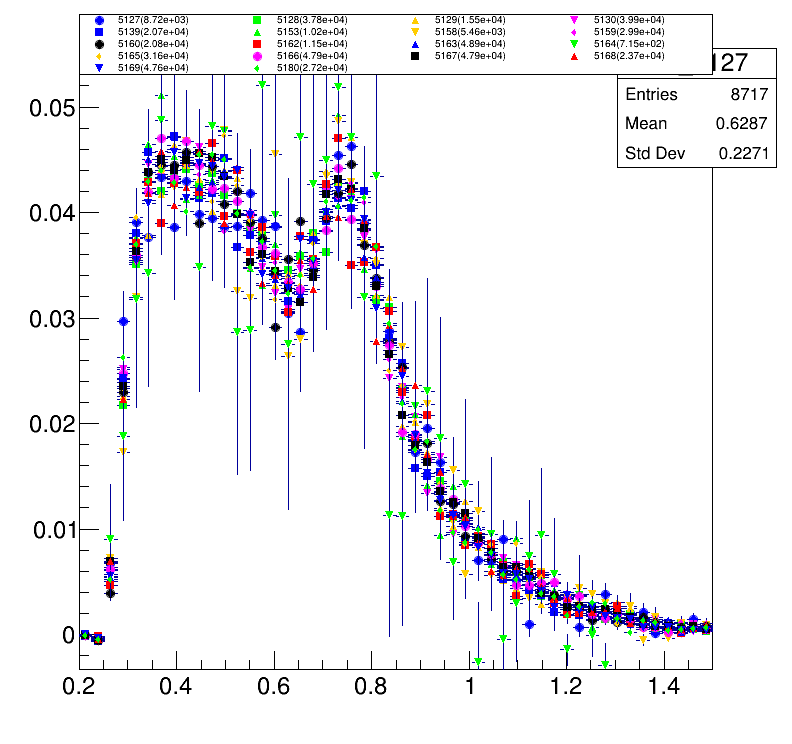

In [18]:
canvas_list[1].Draw()

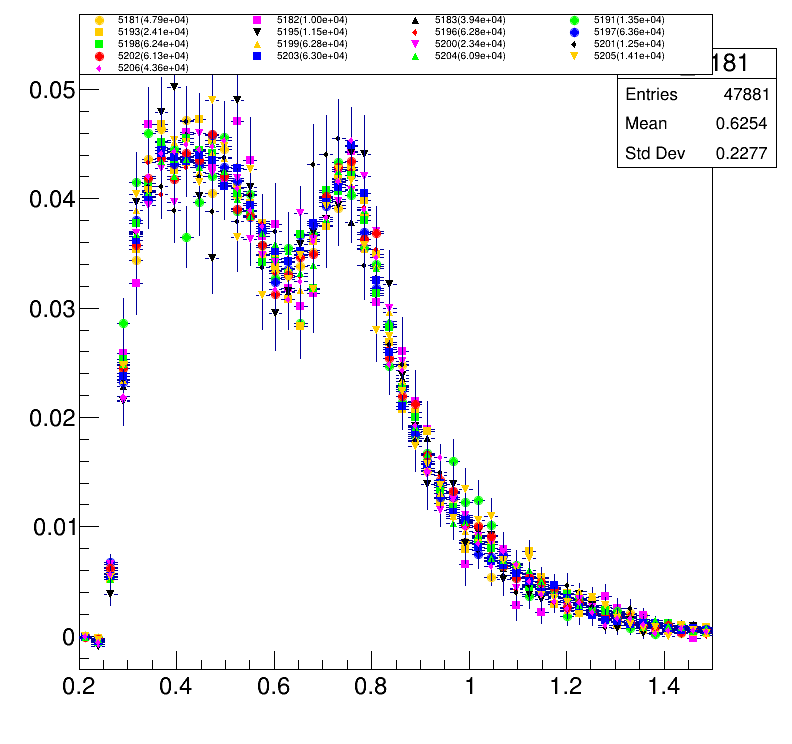

In [19]:
canvas_list[2].Draw()

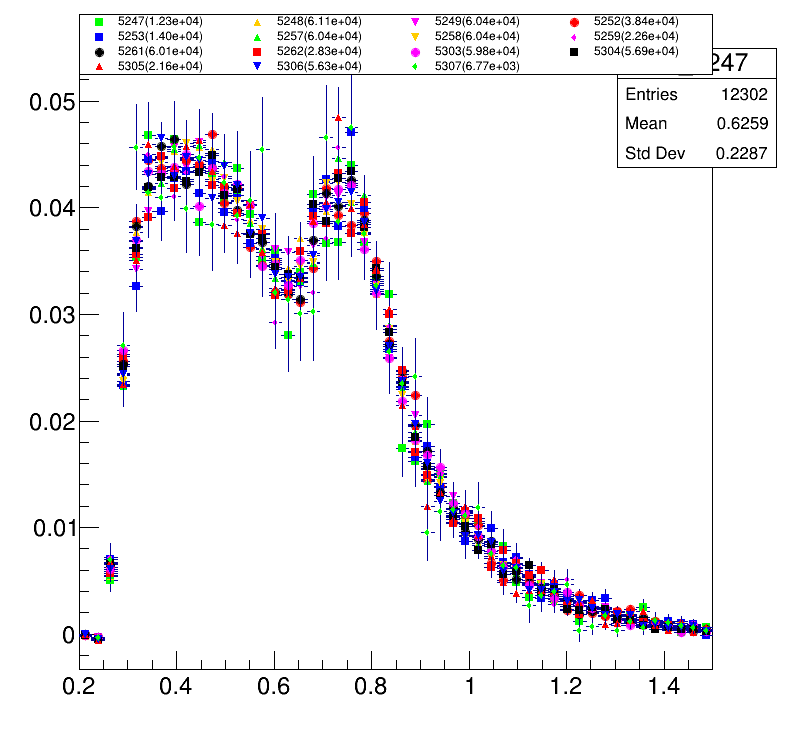

In [20]:
canvas_list[4].Draw()